In [8]:
import pandas as pd
from utils.utils import *
from collections import defaultdict 
import matplotlib.pyplot as plt
import numpy as np

### Prepare the data for plotting

In [10]:
result_pickle = open('result/result.p', "rb")
ssdd_bloom_result = pickle.load(result_pickle)
plot_dic = defaultdict(list)
fam_prec = []
fam_rec = []
census_match = []
birth_match = []
threshold = []

for k,v in ssdd_bloom_result.items():
    e_prec = v[0]  #estimated precision
    e_recall = v[1] #estimated recall
    e_F = 2*e_prec*e_recall/(e_prec+e_recall)
    e_Fstar = e_F/(2-e_F)
    prec = v[2] #supervised precision
    recall = v[3] #supervised recall
    F = 2*prec*recall/(prec+recall)
    Fstar = F/(2-F)
    gt_correct = v[4]
    key = (k[1],k[2]) #(year, age)
    
    if key in plot_dic:
        plot_dic[key][0].append(e_prec) #estimated precision 
        plot_dic[key][1].append(e_recall) #estimated recall
        plot_dic[key][2].append(e_F) #estimated F-measure
        plot_dic[key][3].append(e_Fstar) #stimated F*
        plot_dic[key][4].append(prec) #family precision
        plot_dic[key][5].append(recall) #family recall
        plot_dic[key][6].append(F) #family F-measure
        plot_dic[key][7].append(Fstar) #family F*
        plot_dic[key][8].append(gt_correct) #gt correct
    else:
        plot_dic[key] = [[e_prec],[e_recall], [e_F], [e_Fstar], [prec], [recall], [F], [Fstar],[gt_correct]]  

In [11]:
#plotting parameters
lw = 4
font_size = 65
x = np.array([0.5, 0.8, 0.85, 0.9, 0.95, 1.0]) # x-axis
data_list = [(1871, 10), (1891, 10), (1871, 20), (1891, 20), (1871, 1000), (1891, 1000)]
label_list = [('Age<=10'), ('Age<=20'), ('All ages')]

### Estimated and actual precision curves

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


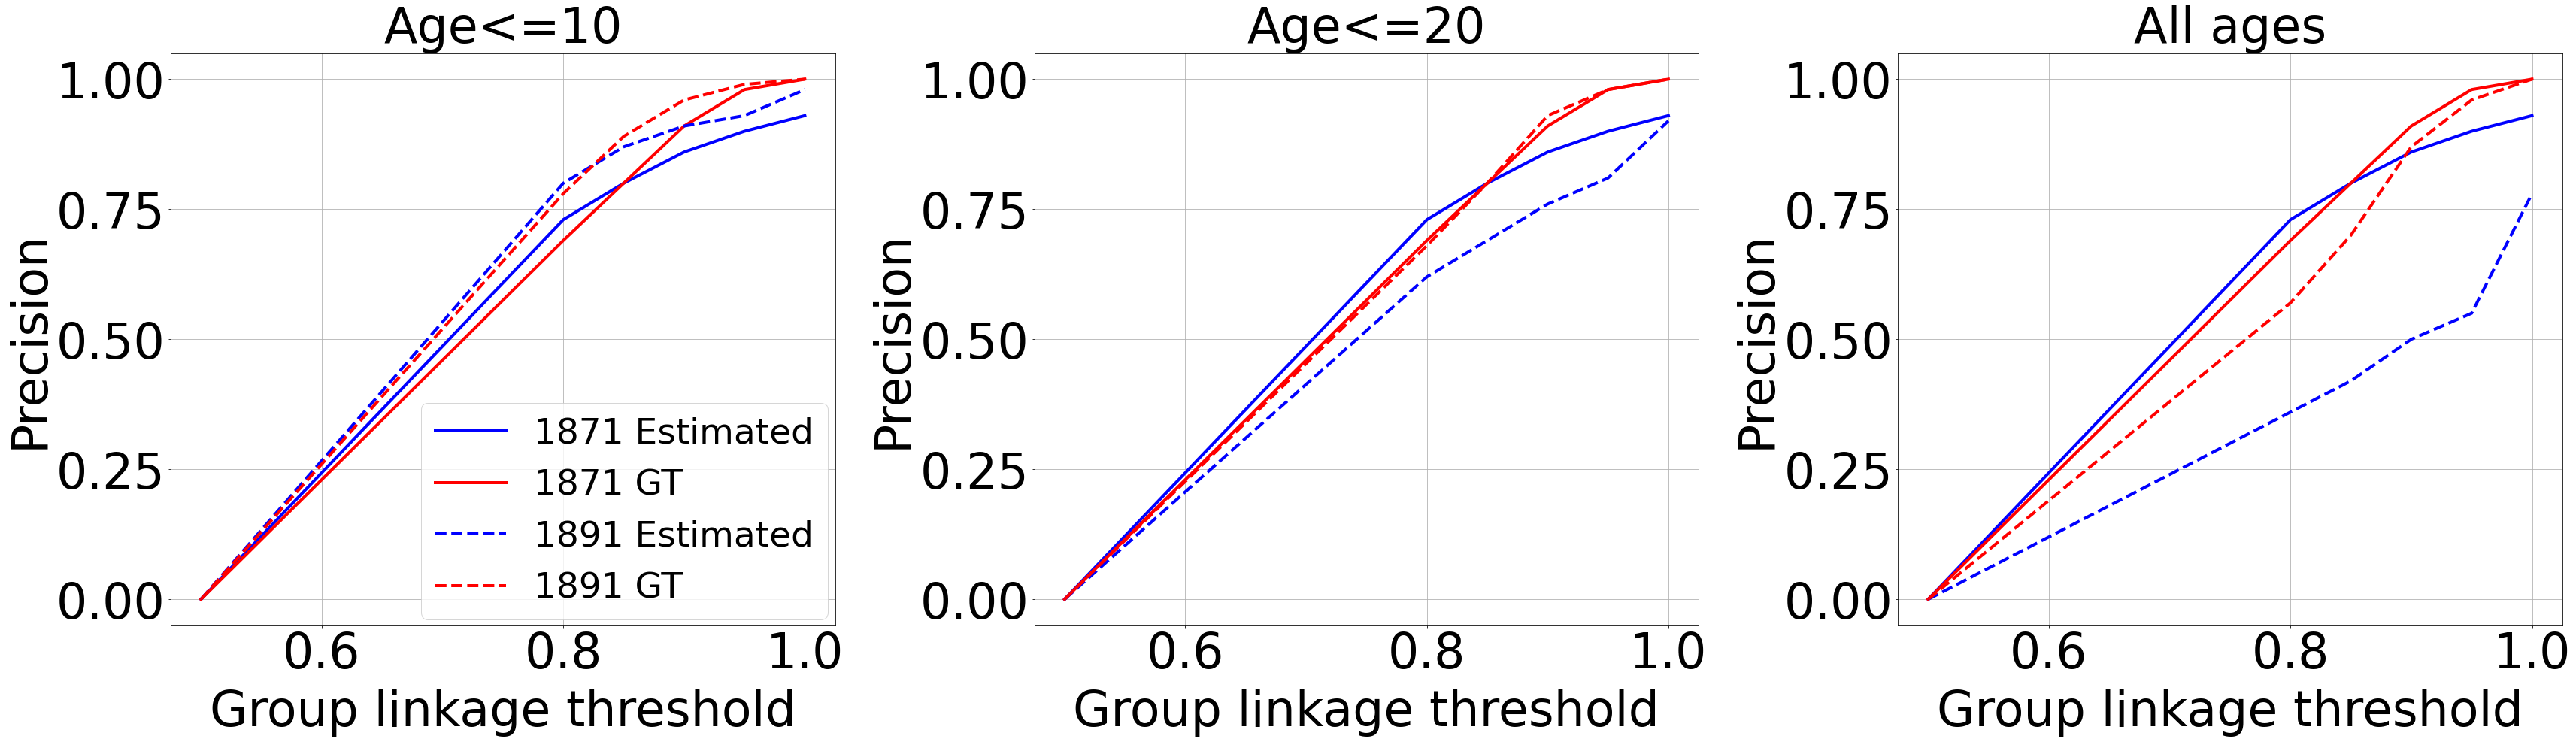

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(57, 14))
axs = axes.flatten()
plt.subplots_adjust(hspace=0.5, wspace=0.3) 
legend_size=47


for i in range(0,6,2):
    key71 = data_list[i]
    key91 = data_list[i+1]
    y_data71_1 = plot_dic[key71][0] #estimated prec to plot in 1871
    y_data71_2 = plot_dic[key71][4]  #GT prec to plot in 1871
    y_data91_1 = plot_dic[key91][0] #estimated prec to plot in 1891
    y_data91_2 = plot_dic[key91][4]  #GT prec to plot in 1891
    j = int(i/2)
    axs[j].plot(x, y_data71_1, color='b', label='1871 Estimated', linewidth = lw)
    axs[j].plot(x, y_data71_2, color='r', label='1871 GT', linewidth = lw)
    axs[j].plot(x, y_data91_1, color='b', linestyle='--', label='1891 Estimated', linewidth = lw)
    axs[j].plot(x, y_data91_2, color='r', linestyle='--', label='1891 GT', linewidth = lw)

    axs[j].set_xlabel('Group linkage threshold', fontsize=font_size, labelpad=13)
    axs[j].set_ylabel('Precision', fontsize=font_size)
    
    axs[j].tick_params(axis='y', labelsize=font_size) #set size of y label
    axs[j].tick_params(axis='x', labelsize=font_size)
    axs[j].grid(True)
    if j == 0:
        axs[j].legend(bbox_to_anchor=(0.35, 0.42), fontsize=legend_size) #position of legend
    
    axs[j].set_title('{}'.format(label_list[j]),fontsize=font_size)

plt.savefig('result/plot/eval_prec.eps',format='eps', bbox_inches='tight')
plt.show()

### Estimated and actual recall curves

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


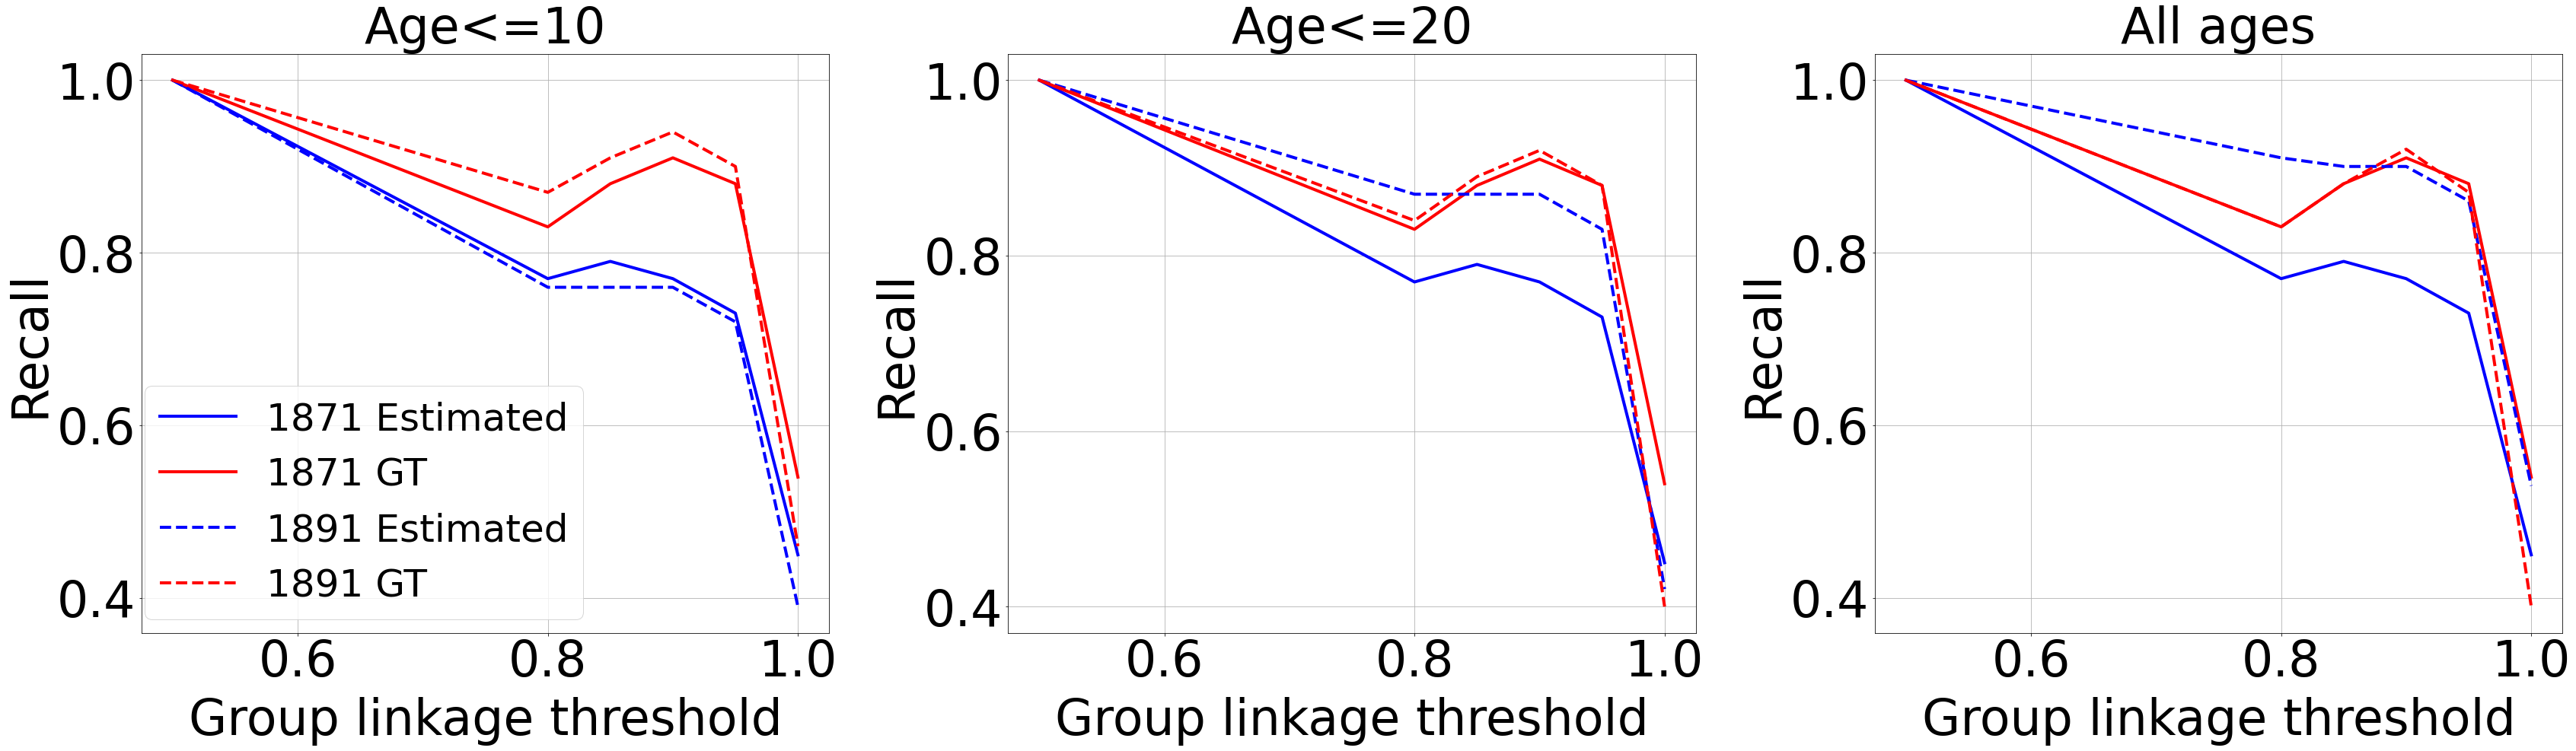

In [13]:
legend_size=50
fig, axes = plt.subplots(1, 3, figsize=(57, 14))
axs = axes.flatten()
plt.subplots_adjust(hspace=0.5, wspace=0.26) 

for i in range(0,6,2):
    key71 = data_list[i]
    key91 = data_list[i+1]
    y_data71_1 = plot_dic[key71][1] #estimated recall to plot in 1871
    y_data71_2 = plot_dic[key71][5]  #GT recall to plot in 1871
    y_data91_1 = plot_dic[key91][1] #estimated recall to plot in 1891
    y_data91_2 = plot_dic[key91][5]  #GT recall to plot in 1891

    j = int(i/2)
    axs[j].plot(x, y_data71_1, color='b', label='1871 Estimated', linewidth = lw)
    axs[j].plot(x, y_data71_2, color='r', label='1871 GT', linewidth = lw)
    axs[j].plot(x, y_data91_1, color='b', linestyle='--', label='1891 Estimated', linewidth = lw)
    axs[j].plot(x, y_data91_2, color='r', linestyle='--', label='1891 GT', linewidth = lw)

    axs[j].set_xlabel('Group linkage threshold', fontsize=font_size, labelpad=13)
    axs[j].set_ylabel('Recall', fontsize=font_size)
    
    axs[j].tick_params(axis='y', labelsize=font_size) #set size of y label
    axs[j].tick_params(axis='x', labelsize=font_size)
    axs[j].grid(True)
    if j==0:
        axs[j].legend(bbox_to_anchor=(0.67, 0.46), fontsize=legend_size) #position of legend
    
    axs[j].set_title('{}'.format(label_list[j]),fontsize=font_size)

plt.savefig('result/plot/eval_rec.eps',format='eps', bbox_inches='tight')
plt.show()

### Estimated and actual Recision-recall curves

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


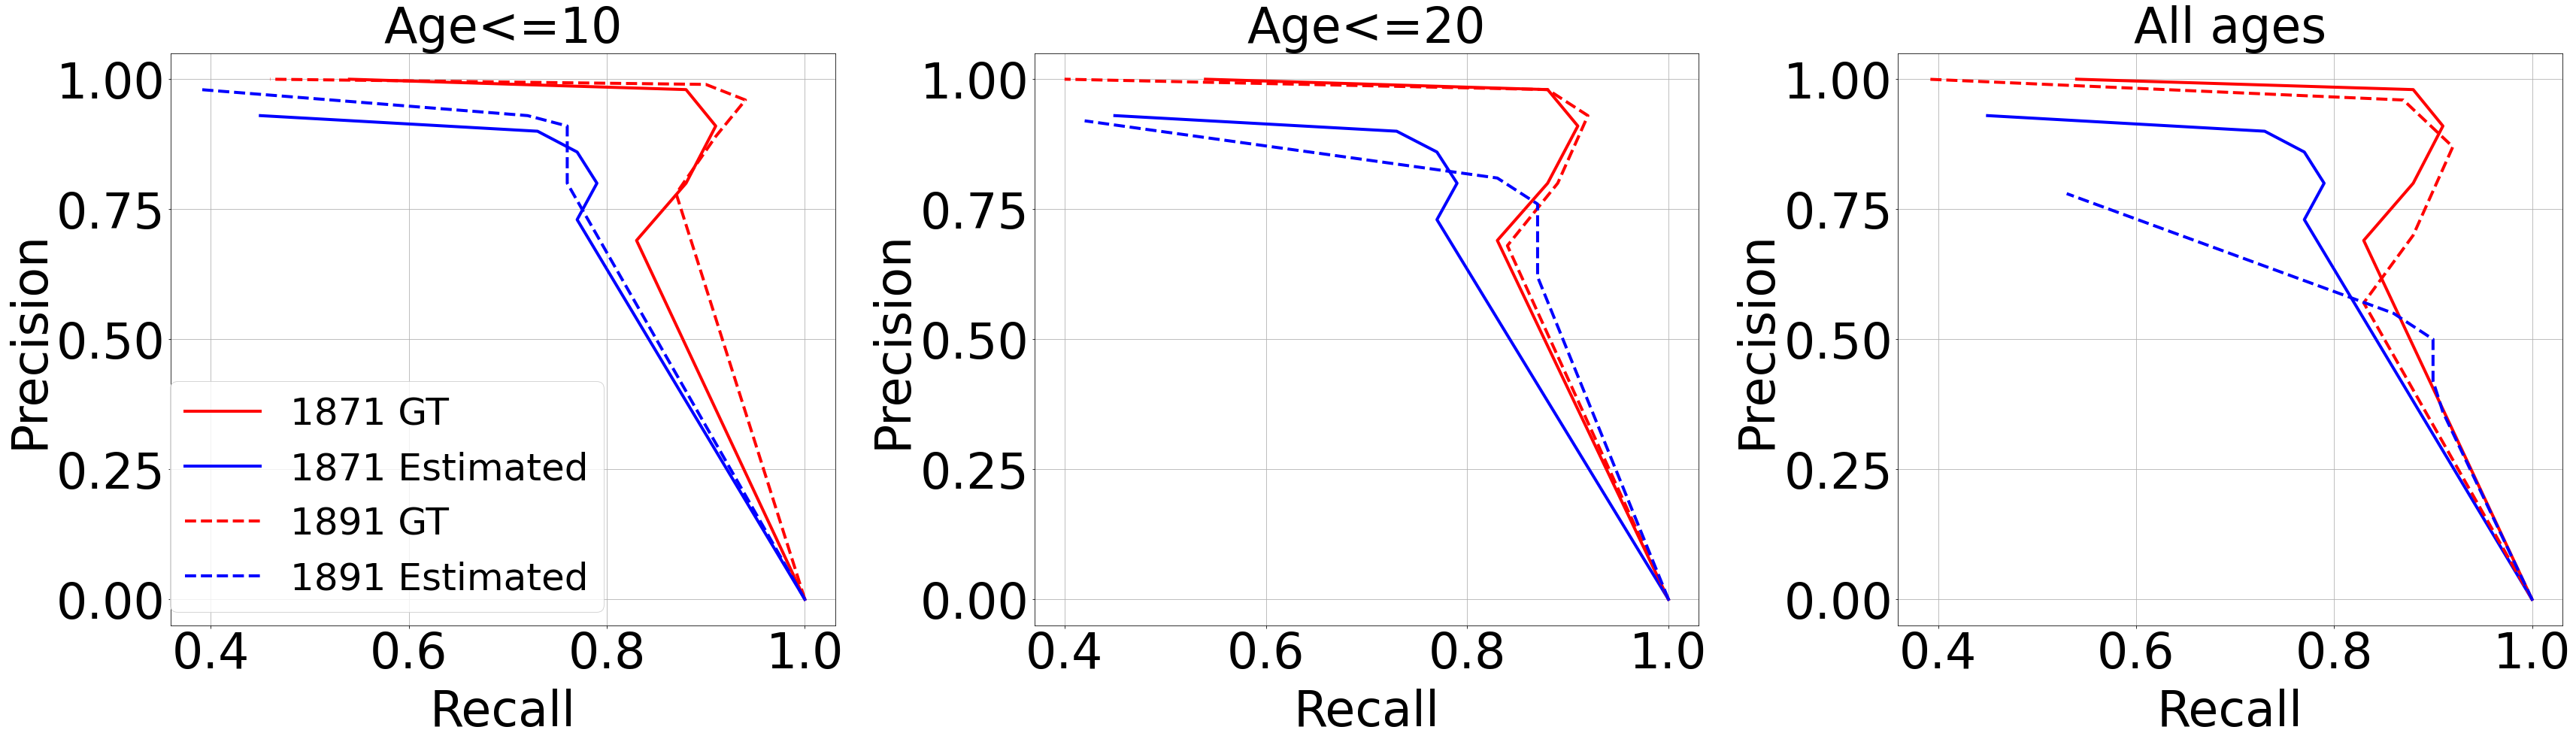

In [14]:
legend_size=50
# Create a 4x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(57, 14))
axs = axes.flatten()
plt.subplots_adjust(hspace=0.5, wspace=0.3) 
for i in range(0,6,2):
    est_prec71 = plot_dic[data_list[i]][0]
    est_rec71 = plot_dic[data_list[i]][1]
    prec71 = plot_dic[data_list[i]][4]
    rec71 = plot_dic[data_list[i]][5]
    est_prec91 = plot_dic[data_list[i+1]][0]
    est_rec91 = plot_dic[data_list[i+1]][1]
    prec91 = plot_dic[data_list[i+1]][4]
    rec91 = plot_dic[data_list[i+1]][5]
    j=int(i/2)
    axs[j].plot(rec71, prec71, color='r', label='1871 GT', linewidth = lw)
    axs[j].plot(est_rec71, est_prec71, color='b', label='1871 Estimated', linewidth = lw)
    axs[j].plot(rec91, prec91, color='r', linestyle='--', label='1891 GT', linewidth = lw)
    axs[j].plot(est_rec91, est_prec91, color='b', linestyle='--', label='1891 Estimated', linewidth = lw)
    # axs[i].legend(["GT supervised","Estimated"], loc="best", fontsize=tick_size)
    axs[j].set_xlabel('Recall', fontsize=font_size, labelpad=13)
    axs[j].set_ylabel('Precision', fontsize=font_size)
    # axs[i].set_ylabel('Precision', fontsize=font_size)
    axs[j].tick_params(axis='y', labelsize=font_size)
    axs[j].tick_params(axis='x', labelsize=font_size)
    axs[j].grid(True)
    if j==0:
        axs[j].legend(bbox_to_anchor=(0.68, 0.46), fontsize=legend_size) #position of legend
    axs[j].set_title('{}'.format(label_list[j]),fontsize=font_size)
# # Save the plot to a PNG file
plt.savefig('result/plot/eval_prec_recall.eps', format='eps', bbox_inches='tight')
plt.show()